In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import math

In [ ]:
%cp /content/drive/MyDrive/BR_mod.csv ./

In [ ]:
df = pd.read_csv("BR_mod.csv")

In [ ]:
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,NaN,0.0,13.0,0.0,3.0,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,1.0,15.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,NaN,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,23.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,1.0,2.0,2.0,NaN,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,1.0,14.0,0.0,2.0,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.0,1.0,1.0,0.0,1,2.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,22.0,0.0,2.0,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,NaN,1.0,1.0,3.0,1,2.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.0,1.0,1.0,2.0,1,2.0,0.0,0.0,0.0,5.0,1.0,2.0,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


In [ ]:
df.columns

Index(['patient.age_at_initial_pathologic_diagnosis',
       'patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision',
       'patient.axillary_lymph_node_stage_method_type',
       'patient.breast_carcinoma_estrogen_receptor_status',
       'patient.breast_carcinoma_progesterone_receptor_status',
       'patient.breast_carcinoma_surgical_procedure_name', 'patient.gender',
       'patient.histological_type', 'patient.history_of_neoadjuvant_treatment',
       'patient.initial_pathologic_diagnosis_method',
       'patient.lab_proc_her2_neu_immunohistochemistry_receptor_status',
       'patient.lymph_node_examined_count', 'patient.margin_status',
       'patient.menopause_status',
       'patient.number_of_lymphnodes_positive_by_he', 'patient.other_dx',
       'patient.person_neoplasm_cancer_status', 'patient.race_list.race',
       'patient.stage_event.pathologic_stage',
       'patient.stage_event.tnm_categories.pathologic_categories.pathologic_m',
       'patient.stage_ev

In [ ]:
df.median()

patient.age_at_initial_pathologic_diagnosis                              58.0
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision      0.8
patient.axillary_lymph_node_stage_method_type                             3.0
patient.breast_carcinoma_estrogen_receptor_status                         1.0
patient.breast_carcinoma_progesterone_receptor_status                     1.0
patient.breast_carcinoma_surgical_procedure_name                          1.0
patient.gender                                                            1.0
patient.histological_type                                                 1.0
patient.history_of_neoadjuvant_treatment                                  0.0
patient.initial_pathologic_diagnosis_method                               0.0
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status            0.0
patient.lymph_node_examined_count                                         9.0
patient.margin_status                                           

In [ ]:
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,13.0,0.0,3.0,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,1.0,15.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,3.0,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,23.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,1.0,14.0,0.0,2.0,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.0,1.0,1.0,0.0,1,2.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,22.0,0.0,2.0,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,3.0,1.0,1.0,3.0,1,2.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.0,1.0,1.0,2.0,1,2.0,0.0,0.0,0.0,5.0,1.0,2.0,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


In [ ]:
data = df.to_numpy()

In [ ]:
type(data)

numpy.ndarray

In [ ]:
length = data.shape[0]
print(length)

1097


In [ ]:
k_values = np.arange(2, 31, 1)
print(k_values)
inertia = []

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]


In [ ]:
def clustering(K):
  
  centroid = (df.sample(n=K)).to_numpy()    # Randomly select K centroid
  Y = np.zeros(length)
  iter = 0
  while(1):
    Z = np.zeros(length)      # Category of each point now
    for i, x in enumerate(data):
      dist = np.zeros(K)
      for j, y in enumerate(centroid):
        dist[j] = np.linalg.norm(y - x)
      Z[i] = np.argmin(dist)
    
    temp = np.linalg.norm(Y - Z)      #Difference between previous clustering and current clustering
    if (temp == 0):
      break
    Y = Z                     # Copy the new category

    for i in range(K):        # Calculating new centriod
      sum = np.zeros(24)
      count = 0
      for j, x in enumerate(data):
        if (Y[j] == i):
          sum = sum + x
          count += 1
      centroid[i] = sum/count
    
    iter += 1
  
  print(iter)              #Iteration Number
    
  sum = 0
  for i, x in enumerate(data):
    j = int (Y[i])
    y = centroid[j]
    sum += np.linalg.norm(y - x)
  sum = sum/length
  inertia.append(sum)

In [ ]:
for k in k_values:
  clustering(k)

7
33
18
24
17
31
22
31
32
42
30
20
23
21
20
22
19
41
21
31
15
18
15
15
17
12
20
16
20


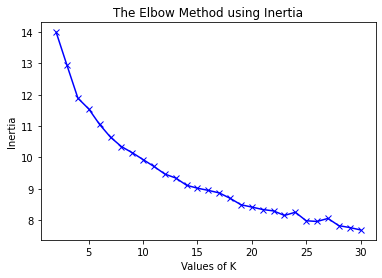

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()